<a href="https://colab.research.google.com/github/Reubenpt123/DAV/blob/main/Neural_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import *
from keras.utils import np_utils
from collections import Counter
from sklearn.svm import LinearSVC
from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.over_sampling import (SMOTE, RandomOverSampler)
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
cd C:\Users\709583\OneDrive - hull.ac.uk\Data Analysis & Visualisation\DAV Assessment\Cefas_smartbuoy

C:\Users\709583\OneDrive - hull.ac.uk\Data Analysis & Visualisation\DAV Assessment\Cefas_smartbuoy


In [ ]:
df = pd.read_csv('clean_data.csv', parse_dates = ['dateTime'])
df = df.set_index('dateTime')
df = df[df['phase'] == 0]
df = df.drop(['phase', 'par_0', 'par_1', 'par_2', 'kd', 'o2'], axis = 1)
df = df.dropna()

X = df.drop(['fluors'], axis = 1)
X = (X - X.mean())/X.std()
y = df['fluors']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train, y_train, X_test, y_test = X_train.to_numpy(), y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy()
df.describe()

,temp,sal,ftu,fluors
count,89970.000000,89970.000000,89970.000000,89970.000000
mean,11.587136,34.823462,6.825146,1.066221
std,4.057505,0.300886,5.577729,1.884379
min,4.860000,33.721000,0.140000,0.000000
25%,8.120500,34.647000,2.540000,0.370000
50%,10.850000,34.845000,5.470000,0.570000
75%,15.140000,35.066000,9.560000,0.950000
max,19.880000,35.475000,47.530000,23.060000


In [ ]:
model = Sequential()
model.add(Dense(units = 1000, activation = "relu", input_shape = (3, )))
model.add(Dropout(0.5))
model.add(Dense(units =750, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 500, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(units = 250, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(units = 100, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dropout(0.1))
model.add(Dense(1, activation = "relu"))
model.summary()
model.compile(loss = "mean_squared_error", optimizer = "adam", metrics=['mean_squared_error'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              4000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 750)               750750    
                                                                 
 dropout_1 (Dropout)         (None, 750)               0         
                                                                 
 dense_2 (Dense)             (None, 500)               375500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_3 (Dense)             (None, 250)               1

In [ ]:
history = model.fit(X_train, y_train, batch_size = 30, epochs = 20, verbose = 1, validation_data = (X_test, y_test))
score = model.evaluate(X_test, y_test, verbose = 1)
#print(f"Test loss = {score[0]}")
#print(f"Test accuracy = {score[1]}")

Epoch 1/20
2100/2100 [==============================] - 50s 24ms/step - loss: 2.7928 - mean_squared_error: 2.7928 - val_loss: 2.3298 - val_mean_squared_error: 2.3298
Epoch 2/20
2100/2100 [==============================] - 50s 24ms/step - loss: 2.5109 - mean_squared_error: 2.5109 - val_loss: 1.9656 - val_mean_squared_error: 1.9656
Epoch 3/20
2100/2100 [==============================] - 53s 25ms/step - loss: 2.3000 - mean_squared_error: 2.3000 - val_loss: 2.1133 - val_mean_squared_error: 2.1133
Epoch 4/20
2100/2100 [==============================] - 49s 23ms/step - loss: 2.2339 - mean_squared_error: 2.2339 - val_loss: 1.9694 - val_mean_squared_error: 1.9694
Epoch 5/20
2100/2100 [==============================] - 42s 20ms/step - loss: 2.1792 - mean_squared_error: 2.1792 - val_loss: 1.9426 - val_mean_squared_error: 1.9426
Epoch 6/20
2100/2100 [==============================] - 42s 20ms/step - loss: 2.1658 - mean_squared_error: 2.1658 - val_loss: 1.9185 - val_mean_squared_error: 1.9185
Epoc

In [ ]:
pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))

pred = model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, pred))) 

1969/1969 [==============================] - 3s 1ms/step
1.1697595451917344
844/844 [==============================] - 1s 1ms/step
1.1676580819620301


In [ ]:
y_pred = model.predict(X)

2812/2812 [==============================] - 3s 1ms/step


C:\Users\709583\AppData\Local\Temp\ipykernel_17564\2621382446.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


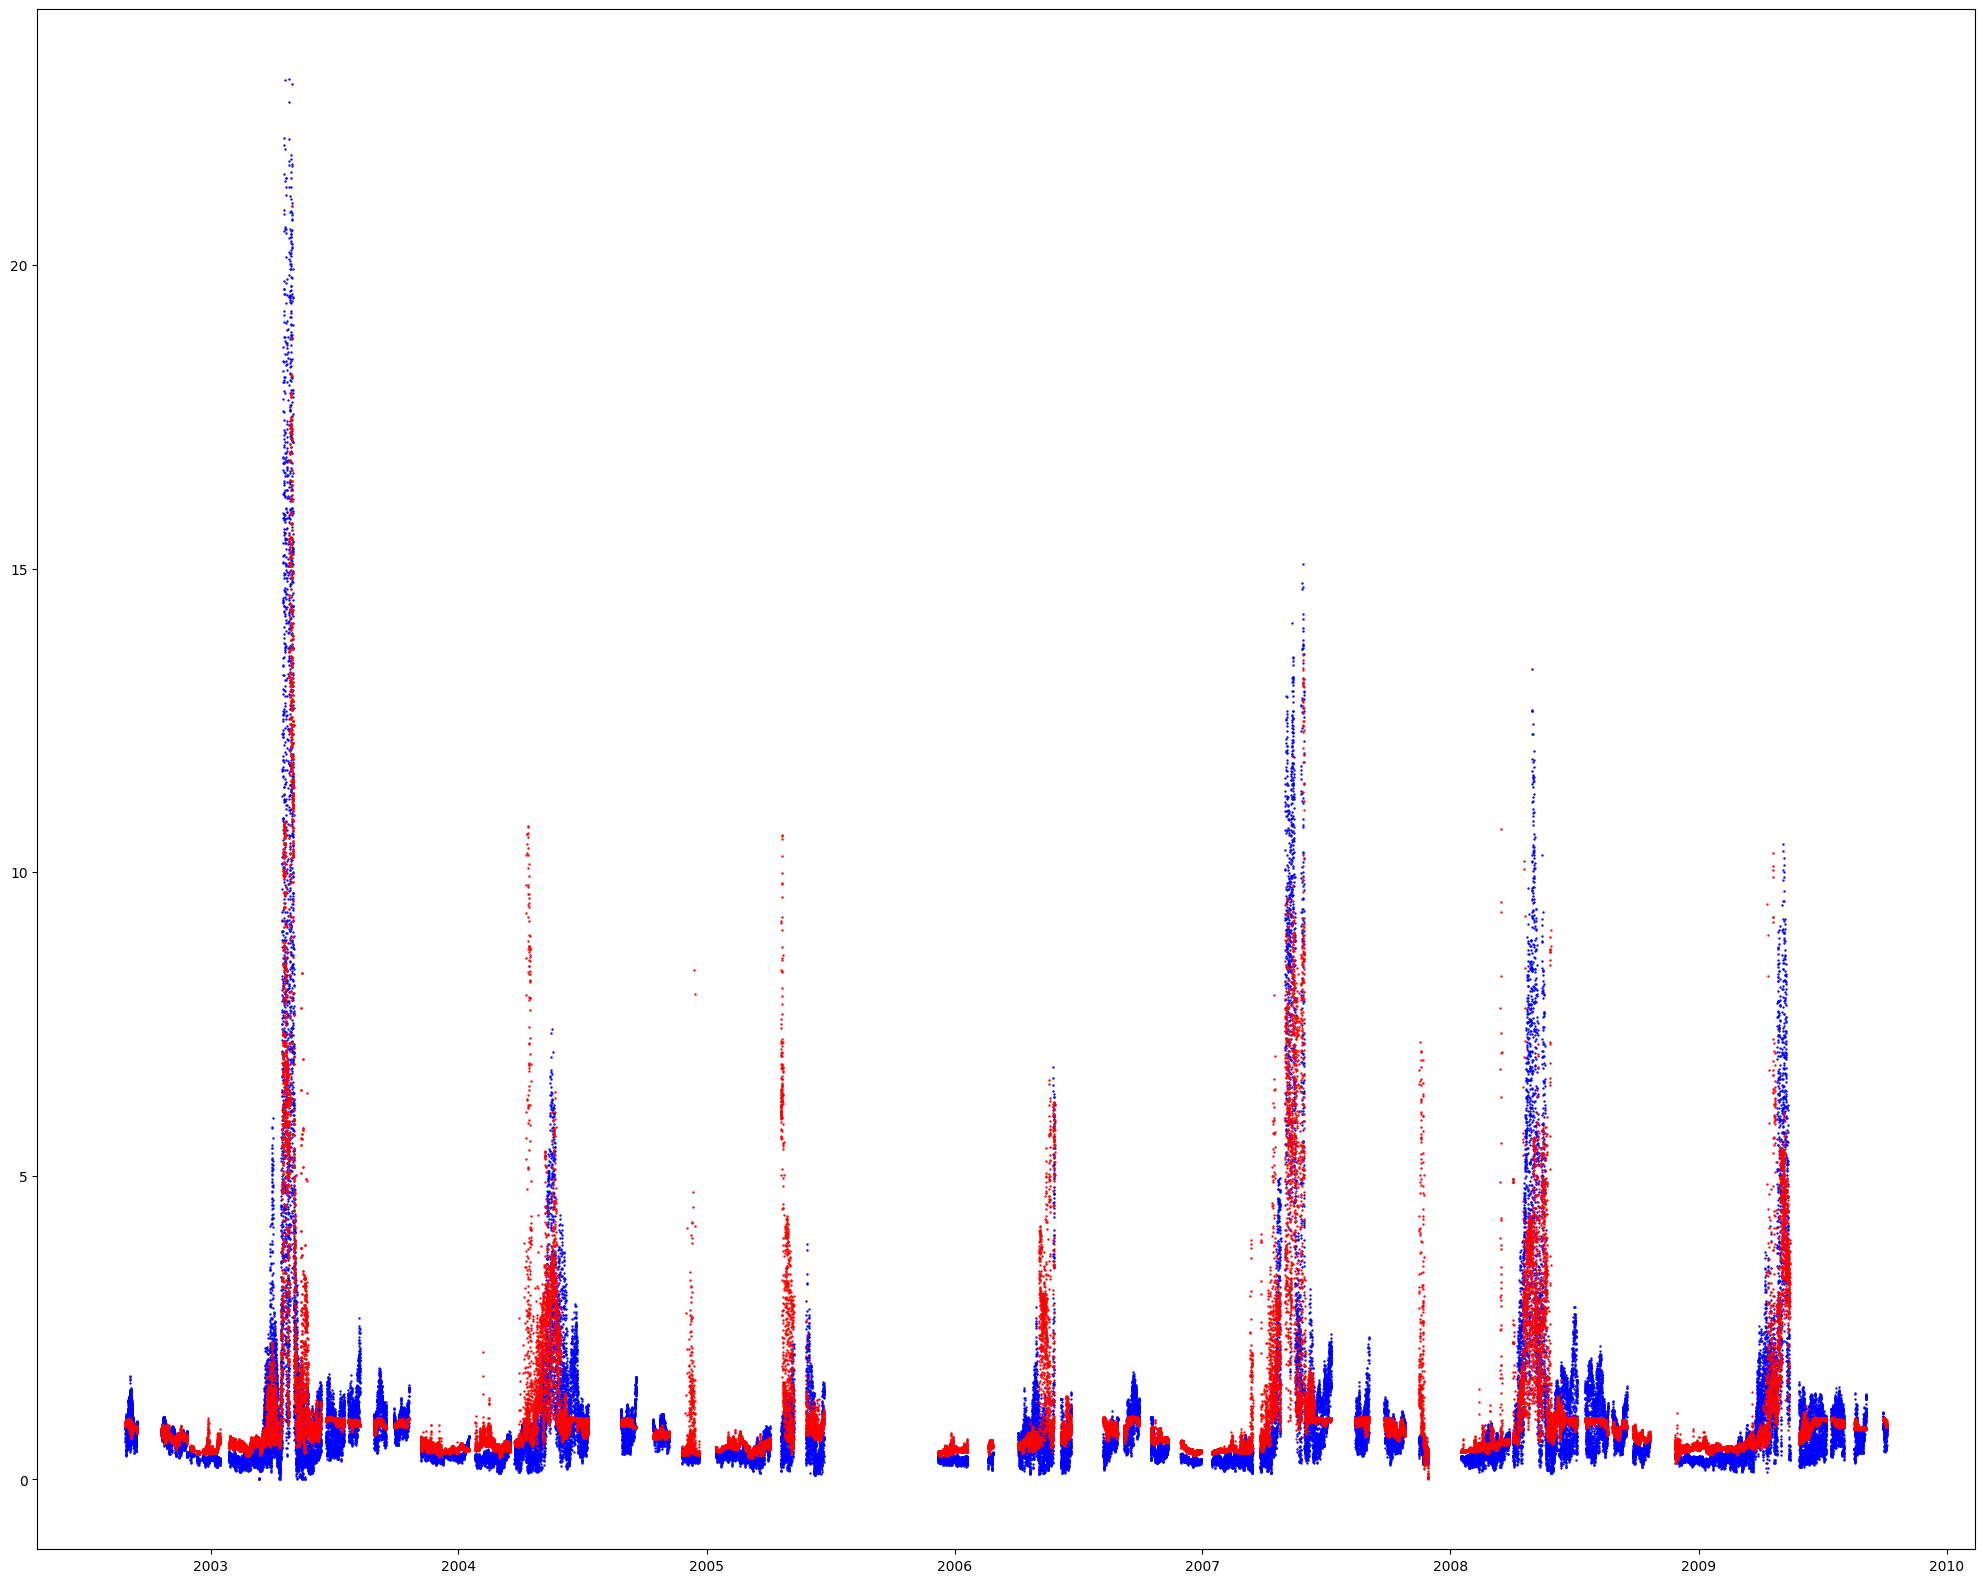

In [ ]:
df['y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (25, 20))
ax.scatter(df.index, df['fluors'], s = 0.5, color = 'blue')
ax.scatter(df.index, df['y_pred'], s = 0.5, color = 'red')
fig.show()

C:\Users\709583\AppData\Local\Temp\ipykernel_17564\3478476897.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


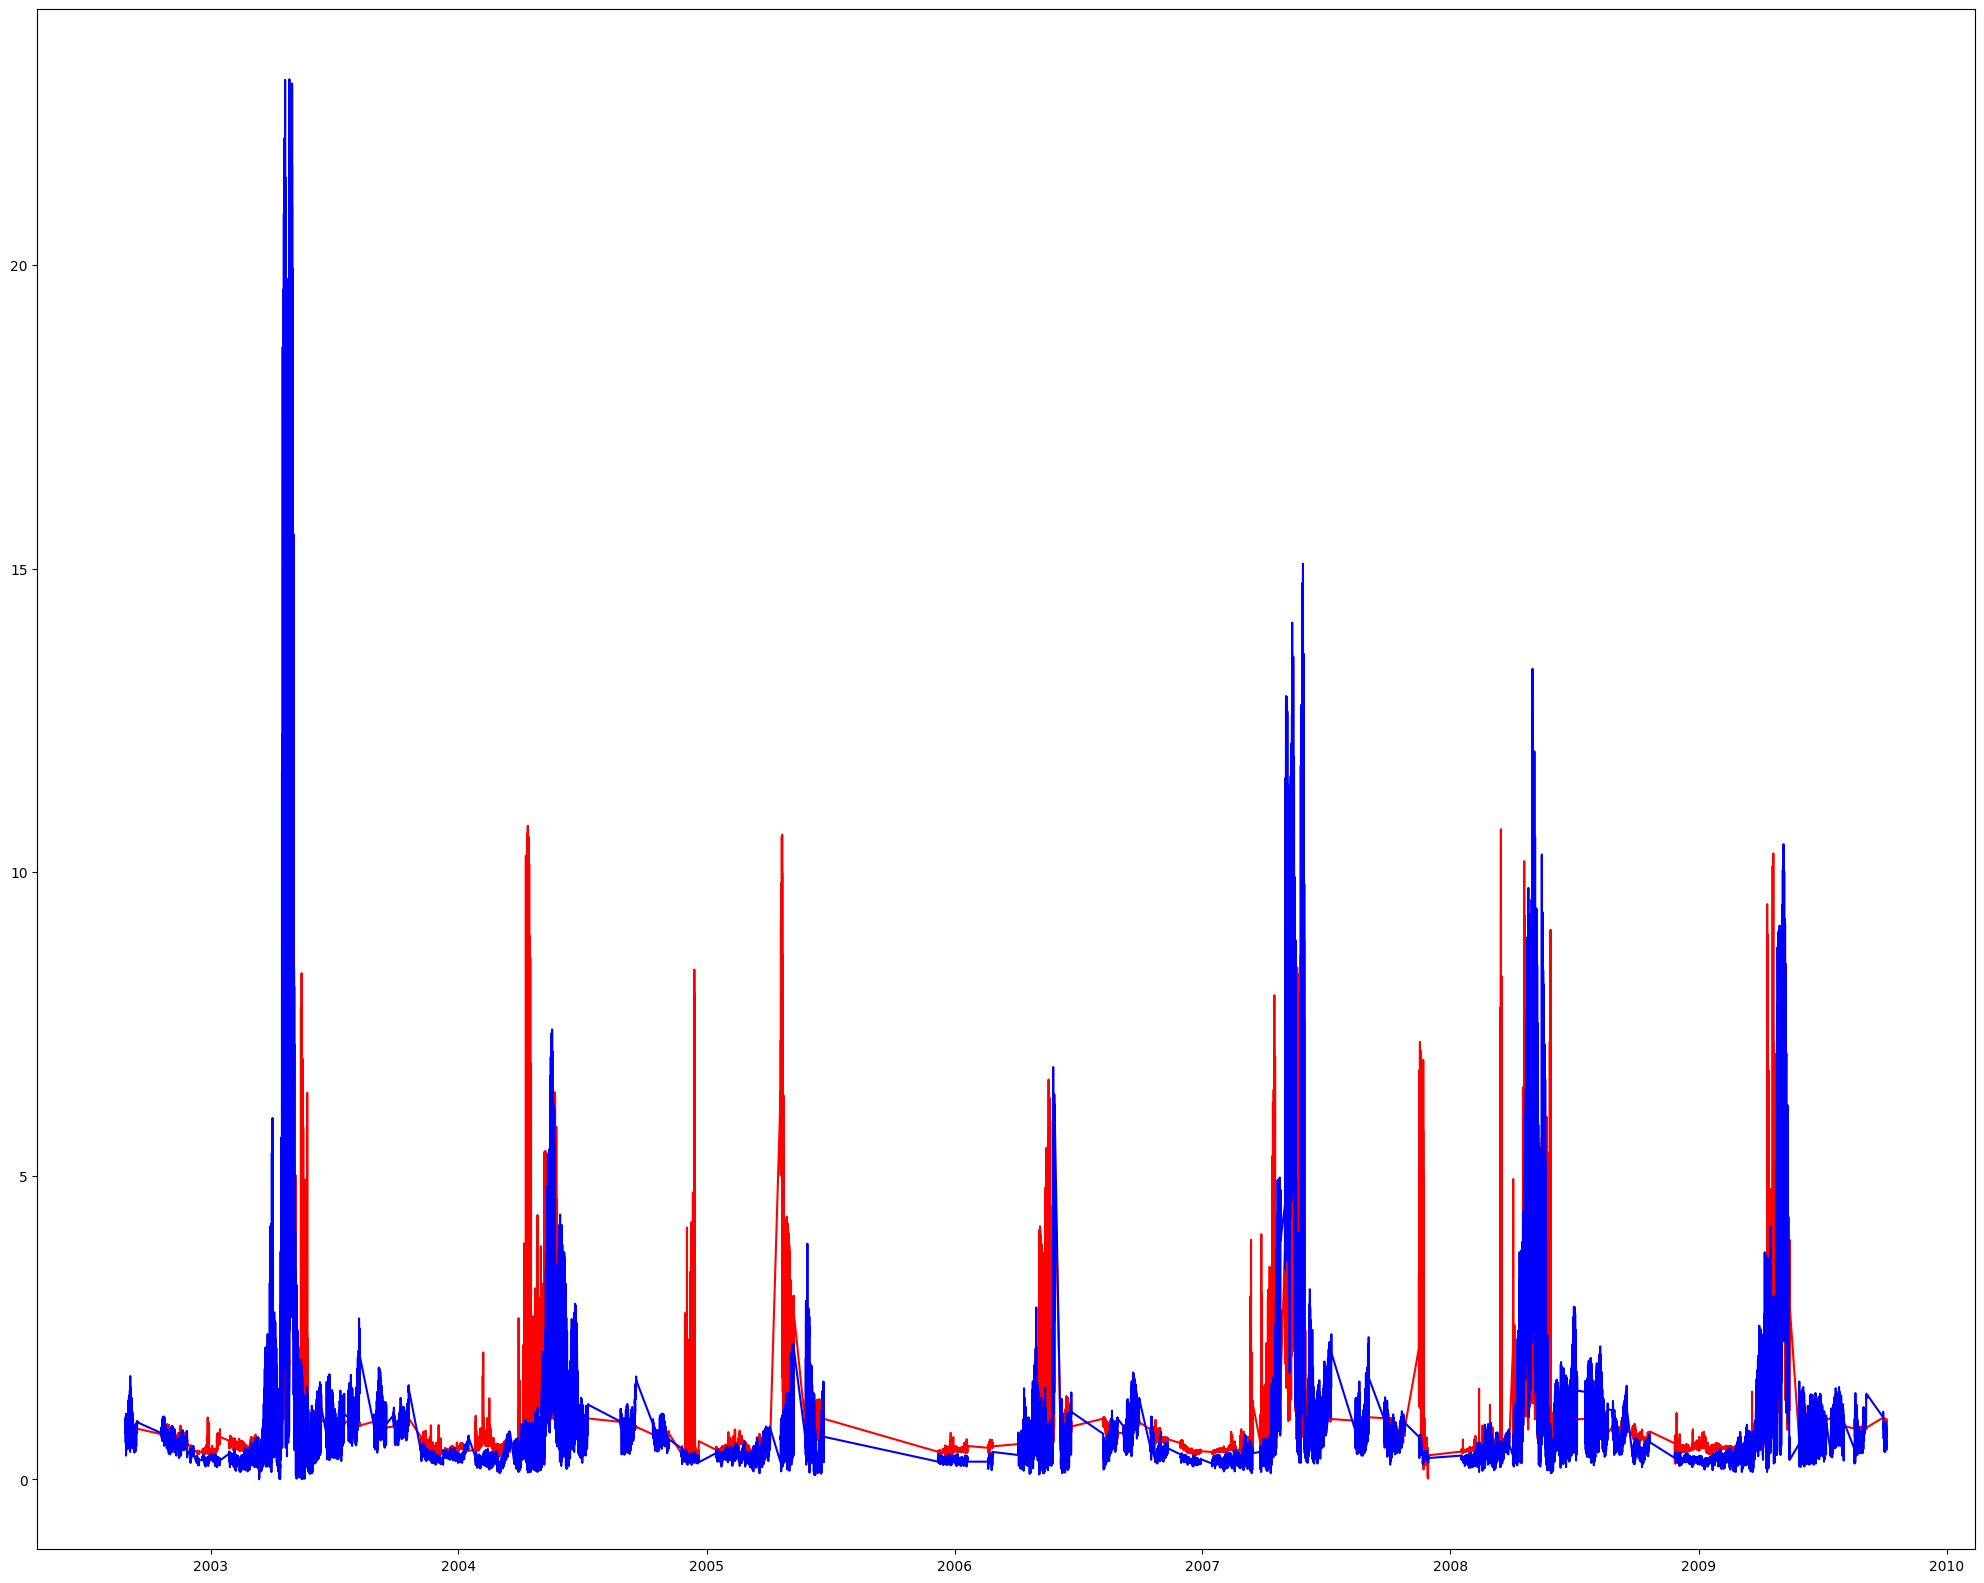

In [ ]:
df['y_pred'] = y_pred
fig, ax = plt.subplots(figsize = (25, 20))
ax.plot(df['y_pred'], markersize = 0.5, color = 'red')
ax.plot(df['fluors'], markersize = 0.5, color = 'blue')
fig.show()